In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#load dataset 
df = pd.read_csv('./data/fer2013.csv')

#show basic info 
print ("shape : ", df.shape)
df.head()

shape :  (35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
X = []  

for i in range(len(df)):
    pixel_string = df['pixels'][i]
    pixel_array = np.array(pixel_string.split(), dtype='float32')
    X.append(pixel_array)

X = np.array(X)
print("Shape before reshape:", X.shape)


Shape before reshape: (35887, 2304)


In [4]:
X = X.reshape (-1, 48, 48, 1)
print ("Shape after reshape : ", X.shape)

Shape after reshape :  (35887, 48, 48, 1)


In [5]:
#normalize pixel values 
X = X/255.0

In [6]:
#extract labels 
y = df['emotion'].values 
print ("labels shape : ", y.shape)
print ("Unique labels : ", np.unique(y))

labels shape :  (35887,)
Unique labels :  [0 1 2 3 4 5 6]


In [7]:
# Boolean masks for each usage type
train_mask = df['Usage'] == 'Training'
val_mask   = df['Usage'] == 'PublicTest'
test_mask  = df['Usage'] == 'PrivateTest'

# Split data
X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (28709, 48, 48, 1) (28709,)
Validation set: (3589, 48, 48, 1) (3589,)
Test set: (3589, 48, 48, 1) (3589,)


In [8]:
from keras.utils import to_categorical

# Convert to one-hot encoding (7 classes)
y_train = to_categorical(y_train, num_classes=7)
y_val   = to_categorical(y_val, num_classes=7)
y_test  = to_categorical(y_test, num_classes=7)

print("y_train shape after one-hot:", y_train.shape)


y_train shape after one-hot: (28709, 7)


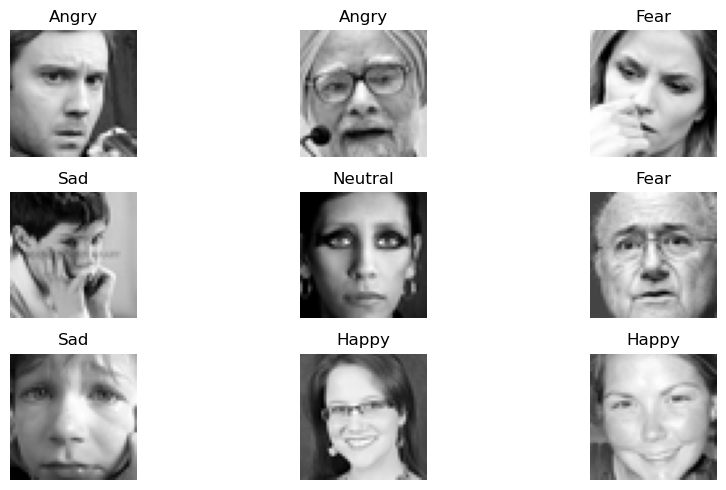

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for each label
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Take one training image and reshape it back to 48x48
    plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
    # Get the label by taking the index of 1 in the one-hot vector
    label_index = np.argmax(y_train[i])
    plt.title(emotion_labels[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
model = Sequential()

# 1st Convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten feature maps into a single vector
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (7 classes)
model.add(Dense(7, activation='softmax'))

# Show model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.2662 - loss: 1.7961 - val_accuracy: 0.4007 - val_loss: 1.5451
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.3936 - loss: 1.5669 - val_accuracy: 0.4572 - val_loss: 1.4412
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4357 - loss: 1.4726 - val_accuracy: 0.4723 - val_loss: 1.3869
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4588 - loss: 1.4066 - val_accuracy: 0.4801 - val_loss: 1.3517
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4752 - loss: 1.3716 - val_accuracy: 0.4985 - val_loss: 1.3228
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4914 - loss: 1.3237 - val_accuracy: 0.4918 - val_loss: 1.3096
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5012 - loss: 1.3038 - val_accuracy: 0.4985 - val_loss: 1.2883
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5159 - loss: 1.2591 - 

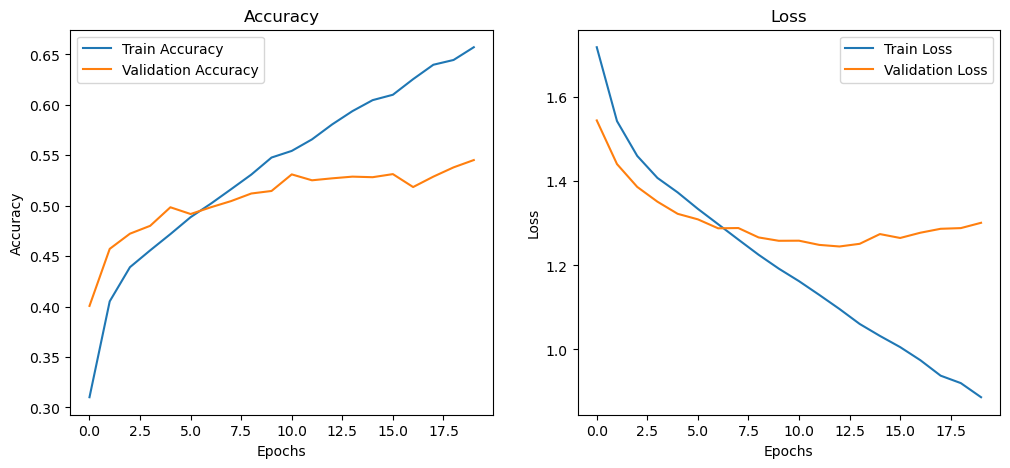

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 1.2310
Test accuracy: 0.553078830242157


In [16]:
import cv2
import numpy as np

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#replace the image at this point to test 
img = cv2.imread('smiling-face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

if len(faces) == 0:
    print("No face detected!")
else:
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w] 
        face = cv2.resize(face, (48, 48))
        face = face / 255.0
        face = face.reshape(1, 48, 48, 1)

        prediction = model.predict(face)
        predicted_class = np.argmax(prediction)
        print("Predicted emotion:", emotion_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted emotion: Happy
